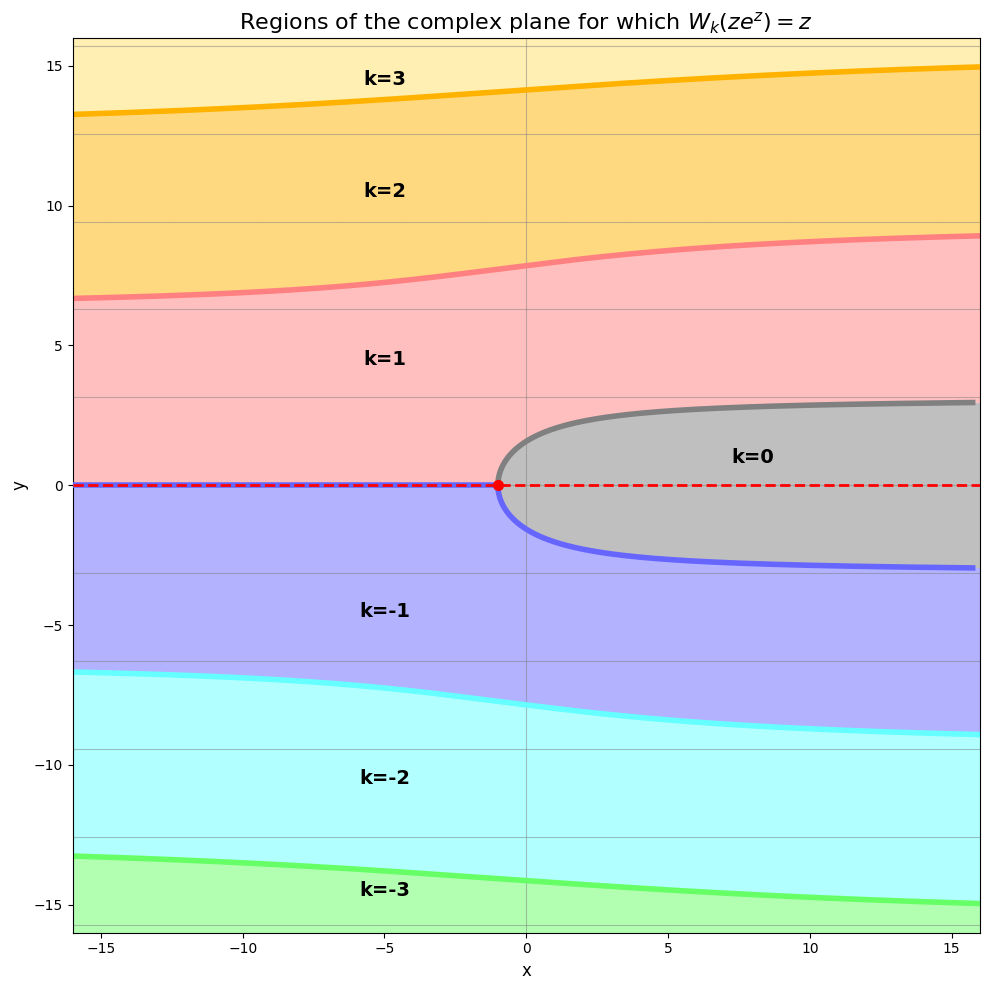

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw

def plot_lambert_regions():
    # Resolution of the grid
    res = 1000
    x_range = 16
    y_range = 16
    
    # Create grid
    x = np.linspace(-x_range, x_range, res)
    y = np.linspace(-y_range, y_range, res)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    # Compute f(z) = z * exp(z)
    W_val = Z * np.exp(Z)
    
    # Initialize regions array with NaN
    regions = np.full(Z.shape, np.nan)
    
    # Define branches to plot with their corresponding colors and label positions
    branches = {
        3:  {'color': '#ffe066', 'label_pos': (-5, 14.5)},   # Light Yellow
        2:  {'color': '#ffb300', 'label_pos': (-5, 10.5)},   # Orange
        1:  {'color': '#ff8080', 'label_pos': (-5, 4.5)},    # Red/Pink
        0:  {'color': '#808080', 'label_pos': (8, 0)},       # Gray
        -1: {'color': '#6666ff', 'label_pos': (-5, -4.5)},   # Blue
        -2: {'color': '#66ffff', 'label_pos': (-5, -10.5)},  # Cyan
        -3: {'color': '#66ff66', 'label_pos': (-5, -14.5)}   # Green
    }
    
    # Evaluate Lambert W for each branch and check identity W(n, z*exp(z)) == z
    for n in branches.keys():
        w_n = lambertw(W_val, k=n)
        # Use a small threshold to handle floating point precision
        mask = np.abs(w_n - Z) < 0.1
        regions[mask] = n

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Create RGB image for background regions
    rgb_image = np.ones((*regions.shape, 3)) 
    for n, props in branches.items():
        mask = (regions == n)
        hex_color = props['color']
        rgb = [int(hex_color[i:i+2], 16)/255.0 for i in (1, 3, 5)]
        rgb_image[mask] = rgb

    # Plot the colored regions
    extent = [-x_range, x_range, -y_range, y_range]
    ax.imshow(rgb_image, origin='lower', extent=extent, aspect='auto',alpha=0.5)
    
    # 1. Plot horizontal grid lines at multiples of pi
    y_pi = np.arange(-5, 6) * np.pi
    for val in y_pi:
        if val > -y_range and val < y_range:
            ax.axhline(val, color='gray', linewidth=0.8, alpha=0.5)
            
    # 2. Plot vertical axis
    ax.axvline(0, color='gray', linewidth=0.8, alpha=0.5)

    # 3. Plot curves x = -y * cot(y) segment by segment
    # The curve segments are separated by vertical asymptotes at multiples of pi.
    k_min = int(-y_range / np.pi) - 1
    k_max = int(y_range / np.pi) + 1
    
    for k in range(k_min, k_max):
        # Define y range for this segment (avoiding exact pi multiples)
        y_segment = np.linspace(k*np.pi + 1e-4, (k+1)*np.pi - 1e-4, 1000)
        
        # Calculate x values for the transcendental curve x = -y * cot(y)
        with np.errstate(divide='ignore', invalid='ignore'):
            x_segment = -y_segment / np.tan(y_segment)
        
        # Keep only points within the visual range
        mask_valid = (x_segment >= -x_range) & (x_segment <= x_range)
        
        if not np.any(mask_valid):
            continue
            
        x_plot = x_segment[mask_valid]
        y_plot = y_segment[mask_valid]
        
        # Branch boundaries correspond to Real(z * exp(z)) <= -1/e.
        # This condition is satisfied for alternating segments of the x = -y cot(y) curve.
        is_boundary = False
        if k >= 0:
            if k % 2 == 0:
                is_boundary = True
        else:
            if k % 2 != 0:
                is_boundary = True
        
        if is_boundary:
            # Boundary Line: These lines represent the branch cuts.
            # Plotted as bold lines colored by the region BELOW the line.
            n_below = k // 2
            
            # Default to black if the branch isn't in our visualization set
            color = 'black' 
            if n_below in branches:
                color = branches[n_below]['color']
                
            ax.plot(x_plot, y_plot, color=color, linewidth=4, alpha=1.0)

    # 3.5. Plot the real axis branch cut: from -infinity to -1
    # Bold color of region n=-1 as requested
    x_cut = np.linspace(-x_range, -1, 100)
    y_cut = np.zeros_like(x_cut)
    
    # Get color for n=-1
    color_n_minus_1 = branches[-1]['color']
    
    # Plot bold line (color of n=-1)
    ax.plot(x_cut, y_cut, color=color_n_minus_1, linewidth=4, alpha=1.0, zorder=5)
    
    # Overlay with red dashed line
    x_real=np.linspace(-x_range,x_range, 100)
    ax.plot(x_real, np.zeros_like(x_real), color='red', linestyle='--', linewidth=2, alpha=1.0, zorder=6)
    # 4. Highlight the branch point {-1, 0} in RED
    ax.plot(-1, 0, 'o', color='red', markersize=8, markeredgewidth=0, zorder=10)
    
    # 5. Add branch labels (n=...)
    for n, props in branches.items():
        pos = props['label_pos']
        if n==0:
            ax.text(pos[0], 1+pos[1], f'k={n}', fontsize=14, ha='center', va='center', color='black', weight='bold')
        else:
            ax.text(pos[0], pos[1], f'k={n}', fontsize=14, ha='center', va='center', color='black', weight='bold')

        

    # Formatting the plot
    ax.set_title(r'Regions of the complex plane for which $W_k(z e^z) = z$', fontsize=16)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_xlim([-x_range, x_range])
    ax.set_ylim([-y_range, y_range])
    ax.grid(False) # We've already drawn custom grid lines
    
    plt.tight_layout()
    
    # Save output
    output_path = 'lambert_regions.png'
    plt.savefig(output_path, dpi=300)
    plt.show()

if __name__ == "__main__":
    plot_lambert_regions()

Real Lambert W plot saved to real_lambert_plot.png


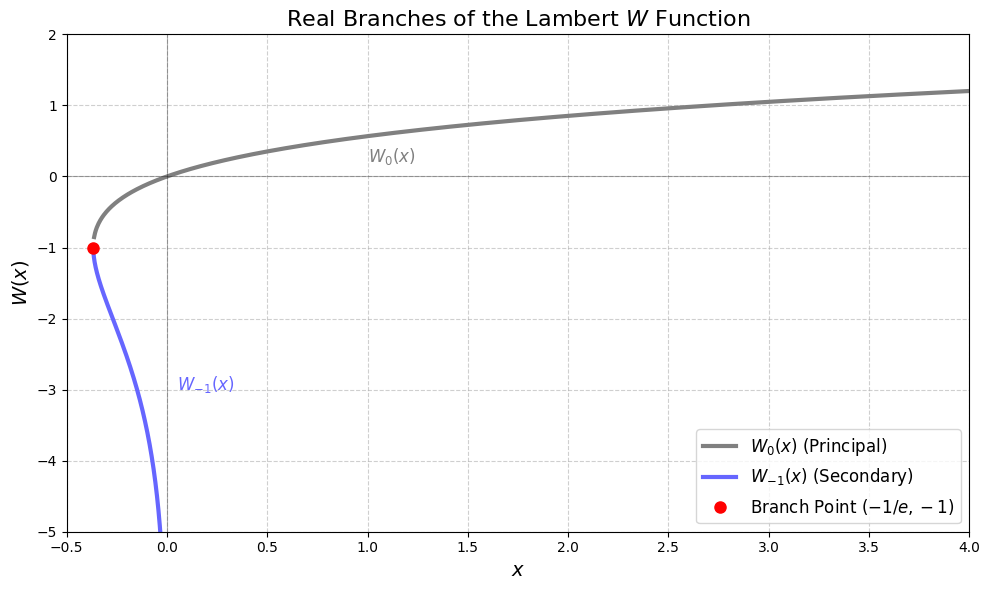

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw


def plot_real_lambert():
    # Define the range for x
    # W_0 is defined for x >= -1/e
    # W_{-1} is defined for -1/e <= x < 0
    
    # We'll use a slightly extended range for better visualization
    x_min = -0.36787944117144233  # -1/e
    x_0 = np.linspace(x_min, 4, 1000)
    x_minus_1 = np.linspace(x_min, -1e-5, 500)  # Avoid 0 for W_{-1}
    
    # Calculate branches
    w_0 = lambertw(x_0, k=0).real
    w_minus_1 = lambertw(x_minus_1, k=-1).real
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot W_0 in Gray as in the complex visualization
    plt.plot(x_0, w_0, color='#808080', linewidth=3, label='$W_0(x)$ (Principal)')
    
    # Plot W_{-1} in Blue as in the complex visualization
    plt.plot(x_minus_1, w_minus_1, color='#6666ff', linewidth=3, label='$W_{-1}(x)$ (Secondary)')
    
    # Plot the branch point at (-1/e, -1)
    plt.plot(x_min, -1, 'ro', markersize=8, label='Branch Point $(-1/e, -1)$')
    
    # Add horizontal and vertical lines for context
    plt.axhline(0, color='black', linewidth=0.8, alpha=0.3)
    plt.axvline(0, color='black', linewidth=0.8, alpha=0.3)
    
    # Labeling
    plt.title('Real Branches of the Lambert $W$ Function', fontsize=16)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$W(x)$', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    
    # Annotate regions based on the reciprocal image logic
    plt.text(1, 0.2, '$W_0(x)$', color='#808080', fontsize=12, fontweight='bold')
    plt.text(+0.05, -3, '$W_{-1}(x)$', color='#6666ff', fontsize=12, fontweight='bold')
    
    # Set limits for clarity
    plt.xlim([-0.5, 4])
    plt.ylim([-5, 2])
    
    plt.tight_layout()
    
    # Save and show
    output_path = 'real_lambert_plot.png'
    plt.savefig(output_path, dpi=300)
    print(f"Real Lambert W plot saved to {output_path}")
    plt.show()

if __name__ == "__main__":
    plot_real_lambert()